# 03 - Ingredient Data Cleaning
## Paula's Choice Ingredient Dictionary Analysis

This notebook cleans and explores the scraped ingredient data from Paula's Choice.

### Objectives:
1. Load both CSV files
2. Explore data structure and quality
3. Identify and remove duplicates
4. Create a clean, unified dataset
5. Perform exploratory data analysis

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Seaborn styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

In [12]:
# Load both CSV files
df1 = pd.read_csv('../data/raw/paulas_choice_perfect_glance_1.csv')
df2 = pd.read_csv('../data/raw/paulas_choice_perfect_glance_2.csv')

print(f"File 1 shape: {df1.shape}")
print(f"File 2 shape: {df2.shape}")
print(f"\nTotal rows before merge: {df1.shape[0] + df2.shape[0]}")

File 1 shape: (2000, 9)
File 2 shape: (543, 9)

Total rows before merge: 2543


## 2. Initial Data Exploration

In [13]:
# Display column names
print("Column names:")
print(df1.columns.tolist())

Column names:
['web_scraper_order', 'web_scraper_start_url', 'ingredient_link', 'ingredient_link-href', 'ingredient_name', 'rating', 'benefits', 'categories', 'INFO_GLANCE']


In [14]:
# Display first few rows from each file
print("First 3 rows from File 1:")
display(df1.head(3))

print("\nFirst 3 rows from File 2:")
display(df2.head(3))

First 3 rows from File 1:


,web_scraper_order,web_scraper_start_url,ingredient_link,ingredient_link-href,ingredient_name,rating,benefits,categories,INFO_GLANCE
0,1766113077-1,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-alcohol.html?crefn1=ingredientRati...,Alcohol,Rating: Average,NaN,"Categories: Emollient, Cleansing Agent, Irritant",NaN
1,1766113083-2,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-alcloxa.html?crefn1=ingredientRati...,Alcloxa,Rating: Average,NaN,"Categories: Irritant, Exfoliant, Cleansing Agent",Combination of sodium salt of aluminum + allantoinUsed for wound healing and burn treatmentHas a...
2,1766113088-3,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-albumen.html?crefn1=ingredientRati...,Albumen,Rating: Average,NaN,Categories: Film-Forming Agent,Another name for egg whiteUsed as food and as a food additiveHas skin tightening properties that...



First 3 rows from File 2:


,web_scraper_order,web_scraper_start_url,ingredient_link,ingredient_link-href,ingredient_name,rating,benefits,categories,INFO_GLANCE
0,1766125183-1,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-zingiber-zerumbet-extract.html?cso...,Zingiber Zerumbet Extract,Rating: Worst,Benefits: Hydration,"Categories: Plant Extracts, Humectant, Irritant",NaN
1,1766125188-2,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-zingiber-zerumbet.html?csortb1=ing...,Zingiber Zerumbet,Rating: Worst,Benefits: Hydration,"Categories: Plant Extracts, Humectant, Irritant",NaN
2,1766125193-3,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-zinc-carbonate.html?csortb1=ingred...,Zinc Carbonate,Rating: Worst,NaN,Categories: Occlusive/Opacifying Agent,NaN


In [15]:
# Check data types and missing values
print("File 1 Info:")
df1.info()

print("\n" + "="*50 + "\n")

print("File 2 Info:")
df2.info()

File 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web_scraper_order      2000 non-null   object
 1   web_scraper_start_url  2000 non-null   object
 2   ingredient_link        2000 non-null   object
 3   ingredient_link-href   2000 non-null   object
 4   ingredient_name        1999 non-null   object
 5   rating                 1995 non-null   object
 6   benefits               1533 non-null   object
 7   categories             1970 non-null   object
 8   INFO_GLANCE            1159 non-null   object
dtypes: object(9)
memory usage: 140.8+ KB


File 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web_scraper_order      543 non-null    object
 1   w

## 3. Check for Duplicates

In [16]:
# Check for duplicate ingredient names within each file
print("Duplicates in File 1:")
dup1 = df1['ingredient_name'].duplicated().sum()
print(f"  Count: {dup1}")

print("\nDuplicates in File 2:")
dup2 = df2['ingredient_name'].duplicated().sum()
print(f"  Count: {dup2}")

# Show some duplicate examples if they exist
if dup1 > 0:
    print("\nDuplicate examples in File 1:")
    display(df1[df1['ingredient_name'].duplicated(keep=False)].sort_values('ingredient_name').head(10))

if dup2 > 0:
    print("\nDuplicate examples in File 2:")
    display(df2[df2['ingredient_name'].duplicated(keep=False)].sort_values('ingredient_name').head(10))

Duplicates in File 1:
  Count: 5

Duplicates in File 2:
  Count: 3

Duplicate examples in File 1:


,web_scraper_order,web_scraper_start_url,ingredient_link,ingredient_link-href,ingredient_name,rating,benefits,categories,INFO_GLANCE
1954,1766123485-1955,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-alpha-hydroxy-acid.html?crefn1=ing...,AHA,Rating: Best,"Benefits: Anti-Aging, Dark Spot Fading, Evens Skin Tone, Hydration","Categories: Exfoliant, Humectant",AKA alpha hydroxy acidExfoliates skin and improves visible signs of agingParticularly suited for...
1975,1766123596-1976,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-aha.html?crefn1=ingredientRating&c...,AHA,Rating: Best,"Benefits: Anti-Aging, Dark Spot Fading, Evens Skin Tone, Hydration","Categories: Exfoliant, Humectant",AKA alpha hydroxy acidExfoliates skin and improves visible signs of agingParticularly suited for...
1891,1766123149-1892,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-bha-beta-hydroxy-acid.html?crefn1=...,BHA (Beta Hydroxy Acid),Rating: Best,"Benefits: Anti-Acne, Blackhead Reducing, Soothing",Categories: Exfoliant,Also known as salicylic acidBest known for exfoliating/anti-acne propertiesHelps skin shed in a ...
1894,1766123165-1895,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-beta-hydroxy-acid.html?crefn1=ingr...,BHA (Beta Hydroxy Acid),Rating: Best,"Benefits: Anti-Acne, Blackhead Reducing, Soothing",Categories: Exfoliant,Also known as salicylic acidBest known for exfoliating/anti-acne propertiesHelps skin shed in a ...
1434,1766120713-1435,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-persea-gratissima-oil.html?crefn1=...,Persea Gratissima (Avocado) Oil,Rating: Best,"Benefits: Hydration, Anti-Aging, Soothing","Categories: Emollient, Antioxidant, Plant Extracts",NaN
1435,1766120718-1436,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-persea-gratissima-avocado-oil.html...,Persea Gratissima (Avocado) Oil,Rating: Best,"Benefits: Hydration, Anti-Aging, Soothing","Categories: Emollient, Antioxidant, Plant Extracts","Excellent source of fatty acidsReplenishes, smooths, & softens skinRich in natural antioxidantsH..."
1331,1766120165-1332,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-rubus-idaeus-raspberry-fruit-extra...,Rubus Idaeus (Raspberry) Fruit Extract,Rating: Best,"Benefits: Anti-Aging, Soothing","Categories: Antioxidant, Plant Extracts","Contains a broad range of antioxidants, including vitamins C & ECan inhibit enzymes in skin that..."
1332,1766120170-1333,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-red-raspberry-extract.html?crefn1=...,Rubus Idaeus (Raspberry) Fruit Extract,Rating: Best,"Benefits: Anti-Aging, Soothing","Categories: Antioxidant, Plant Extracts",NaN
1263,1766119802-1264,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-sun-protection-factor.html?crefn1=...,What Does SPF (Sun Protection Factor) Mean?,NaN,NaN,NaN,NaN
1272,1766119851-1273,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood


Duplicate examples in File 2:


,web_scraper_order,web_scraper_start_url,ingredient_link,ingredient_link-href,ingredient_name,rating,benefits,categories,INFO_GLANCE
241,1766126465-242,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-age.html?csortb1=ingredientNotRate...,Advanced Glycation Endproduct (AGE),Rating: Worst,NaN,Categories: Irritant,Destructive substances generated in the bodyProduct of consuming refined sugarsDestroy collagen ...
243,1766126475-244,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-advanced-glycation-endproduct.html...,Advanced Glycation Endproduct (AGE),Rating: Worst,NaN,Categories: Irritant,Destructive substances generated in the bodyProduct of consuming refined sugarsDestroy collagen ...
242,1766126470-243,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-aerocarpus-santalinus.html?csortb1...,Pterocarpus Santalinus,Rating: Average,Benefits: Anti-Aging,"Categories: Antioxidant, Plant Extracts, Fragrance: Synthetic and Natural, Irritant",Type of tree found native to south IndiaUsed in traditional Ayurvedic medicineExtract has antiox...
393,1766127272-394,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-pterocarpus-santalinus.html?csortb...,Pterocarpus Santalinus,Rating: Average,Benefits: Anti-Aging,"Categories: Antioxidant, Plant Extracts, Fragrance: Synthetic and Natural, Irritant",Type of tree found native to south IndiaUsed in traditional Ayurvedic medicineExtract has antiox...
13,1766125252-14,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-uvb.html?csortb1=ingredientNotRate...,The Difference Between UVA and UVB Rays,NaN,NaN,NaN,NaN
14,1766125257-15,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-uva.html?csortb1=ingredientNotRate...,The Difference Between UVA and UVB Rays,NaN,NaN,NaN,NaN


In [17]:
# Check for overlap between files
overlap = set(df1['ingredient_name']) & set(df2['ingredient_name'])
print(f"Number of overlapping ingredients between files: {len(overlap)}")

if len(overlap) > 0:
    print("\nFirst 10 overlapping ingredients:")
    print(sorted(list(overlap))[:10])

Number of overlapping ingredients between files: 2

First 10 overlapping ingredients:
['Albumen', 'The Ultimate Guide to pH and Your Skin']


## 4. Merge and Deduplicate

In [18]:
# Concatenate both dataframes
df_combined = pd.concat([df1, df2], ignore_index=True)

print(f"Combined shape before deduplication: {df_combined.shape}")
print(f"Unique ingredients before deduplication: {df_combined['ingredient_name'].nunique()}")

Combined shape before deduplication: (2543, 9)
Unique ingredients before deduplication: 2532


In [19]:
# Remove duplicates based on ingredient_name (keep first occurrence)
df_clean = df_combined.drop_duplicates(subset='ingredient_name', keep='first')

print(f"\nCleaned shape after deduplication: {df_clean.shape}")
print(f"Unique ingredients after deduplication: {df_clean['ingredient_name'].nunique()}")
print(f"\nRows removed: {df_combined.shape[0] - df_clean.shape[0]}")


Cleaned shape after deduplication: (2533, 9)
Unique ingredients after deduplication: 2532

Rows removed: 10


In [20]:
# Reset index
df_clean = df_clean.reset_index(drop=True)

# Display sample
print("Sample of cleaned data:")
display(df_clean.head(10))

Sample of cleaned data:


,web_scraper_order,web_scraper_start_url,ingredient_link,ingredient_link-href,ingredient_name,rating,benefits,categories,INFO_GLANCE
0,1766113077-1,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-alcohol.html?crefn1=ingredientRati...,Alcohol,Rating: Average,NaN,"Categories: Emollient, Cleansing Agent, Irritant",NaN
1,1766113083-2,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-alcloxa.html?crefn1=ingredientRati...,Alcloxa,Rating: Average,NaN,"Categories: Irritant, Exfoliant, Cleansing Agent",Combination of sodium salt of aluminum + allantoinUsed for wound healing and burn treatmentHas a...
2,1766113088-3,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-albumen.html?crefn1=ingredientRati...,Albumen,Rating: Average,NaN,Categories: Film-Forming Agent,Another name for egg whiteUsed as food and as a food additiveHas skin tightening properties that...
3,1766113093-4,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-acid.html?crefn1=ingredientRating&...,Acid,Rating: Average,NaN,"Categories: Exfoliant, pH Adjuster/Stabilizer",NaN
4,1766113099-5,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-acetyl-tributyl-citrate.html?crefn...,Acetyl Tributyl Citrate,Rating: Average,NaN,Categories: Film-Forming Agent,NaN
5,1766113104-6,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-acacia-farnesiana-extract.html?cre...,Acacia Farnesiana Extract,Rating: Average,NaN,"Categories: Fragrance: Synthetic and Natural, Plant Extracts, Antioxidant, Irritant",Also known as “sweet acacia”Flowers + oil are highly fragrant and potentially irritatingHas astr...
6,1766113109-7,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-sorbitan-palmitate.html?crefn1=ing...,Sorbitan Palmitate,Rating: Good,NaN,"Categories: Emulsifier, Cleansing Agent",Primarily used in skin care as an emulsifierConsidered a nonionic surfactant (mild cleansing age...
7,1766113115-8,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-zizyphus-jujuba-fruit-extract.html...,Ziziphus Jujuba Fruit Extract,Rating: Good,Benefits: Anti-Aging,"Categories: Plant Extracts, Antioxidant",NaN
8,1766113120-9,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-zingiber-aromaticus-extract.html?c...,Zingiber Aromaticus Extract,Rating: Good,Benefits: Anti-Aging,"Categories: Antioxidant, Plant Extracts",Has antioxidant propertiesName can be synonymous with Zingiber zerumbetAlso called fragrant ging...
9,1766113126-10,https://www.paulaschoice.com/ingredient-dictionary?crefn1=ingredientRating&crefv1=Best%7CGood%7C...,Read More,https://www.paulaschoice.com/ingredient-dictionary/ingredient-zinc-sulfate.html?crefn1=ingredien...,Zinc Sulfate,Rating: Good,NaN,Categories: Preservative,Created through the reaction of sulfuric acid and zinc oxideHas stabilizing and preservative pro...


## 5. Data Quality Analysis

In [21]:
# Check for missing values
print("Missing values per column:")
missing = df_clean.isnull().sum()
missing_pct = (missing / len(df_clean)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
display(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

Missing values per column:


,Missing Count,Percentage
INFO_GLANCE,1149,45.361232
benefits,885,34.938808
categories,38,1.500197
rating,7,0.276352
ingredient_name,1,0.039479


In [22]:
# Check for empty strings
print("Empty string counts per column:")
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        empty_count = (df_clean[col] == '').sum()
        if empty_count > 0:
            print(f"  {col}: {empty_count} ({empty_count/len(df_clean)*100:.2f}%)")

Empty string counts per column:


## 6. Exploratory Data Analysis

Rating Distribution:
rating_clean
Good       1170
Best        814
Average     248
Worst       237
Bad          56
Rating:       1
Name: count, dtype: int64


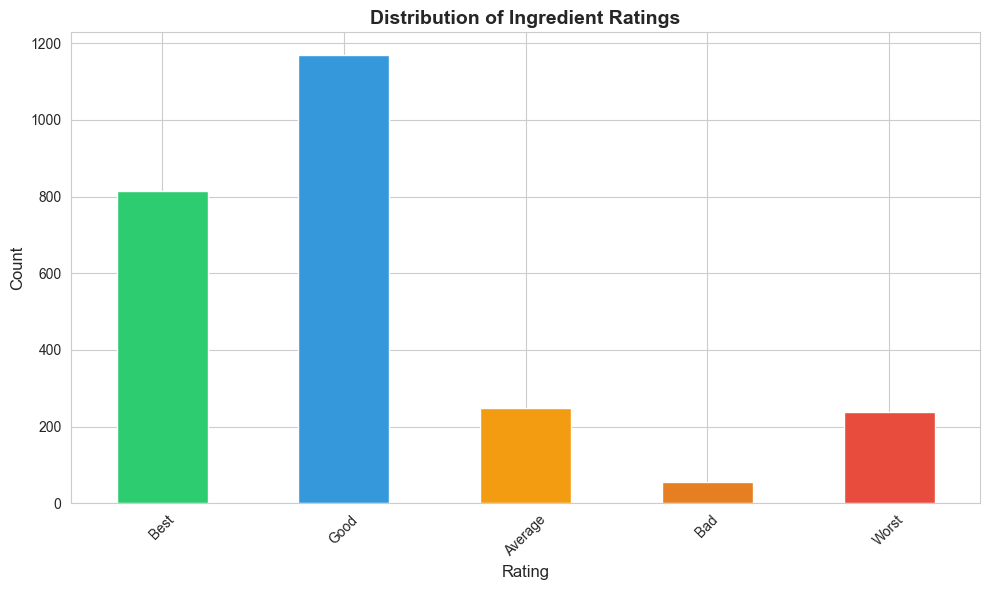

In [23]:
# Extract rating from rating column
df_clean['rating_clean'] = df_clean['rating'].str.replace('Rating: ', '')

# Rating distribution
print("Rating Distribution:")
rating_counts = df_clean['rating_clean'].value_counts()
print(rating_counts)

# Visualization
plt.figure(figsize=(10, 6))
rating_order = ['Best', 'Good', 'Average', 'Bad', 'Worst']
rating_counts = rating_counts.reindex([r for r in rating_order if r in rating_counts.index])
rating_counts.plot(kind='bar', color=['#2ecc71', '#3498db', '#f39c12', '#e67e22', '#e74c3c'])
plt.title('Distribution of Ingredient Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Benefits analysis
print("Ingredients with benefits:")
has_benefits = df_clean['benefits'].notna() & (df_clean['benefits'] != '')
print(f"  Count: {has_benefits.sum()}")
print(f"  Percentage: {has_benefits.sum()/len(df_clean)*100:.2f}%")

# Extract unique benefits
all_benefits = []
for benefits_str in df_clean[has_benefits]['benefits']:
    if isinstance(benefits_str, str) and benefits_str.startswith('Benefits:'):
        benefits = benefits_str.replace('Benefits: ', '').split(', ')
        all_benefits.extend(benefits)

if all_benefits:
    benefits_series = pd.Series(all_benefits)
    print("\nMost common benefits:")
    print(benefits_series.value_counts().head(10))

Ingredients with benefits:
  Count: 1648
  Percentage: 65.06%

Most common benefits:
Anti-Aging            920
Hydration             870
Soothing              461
Evens Skin Tone        95
Dark Spot Fading       72
Oil Control            49
Anti-Acne              41
Smooths Bumpy Skin     20
Pore Minimizer         15
Blackhead Reducing      4
Name: count, dtype: int64


Ingredients with categories:
  Count: 2495
  Percentage: 98.50%

Most common categories:
Plant Extracts                      1027
Antioxidant                          996
Emollient                            469
Texture Enhancer                     359
Humectant                            326
Irritant                             281
Cleansing Agent                      221
Emulsifier                           193
Fragrance: Synthetic and Natural     188
Solvent                              100
pH Adjuster/Stabilizer                80
Peptides                              80
Occlusive/Opacifying Agent            78
Preservative                          77
Film-Forming Agent                    76
Name: count, dtype: int64


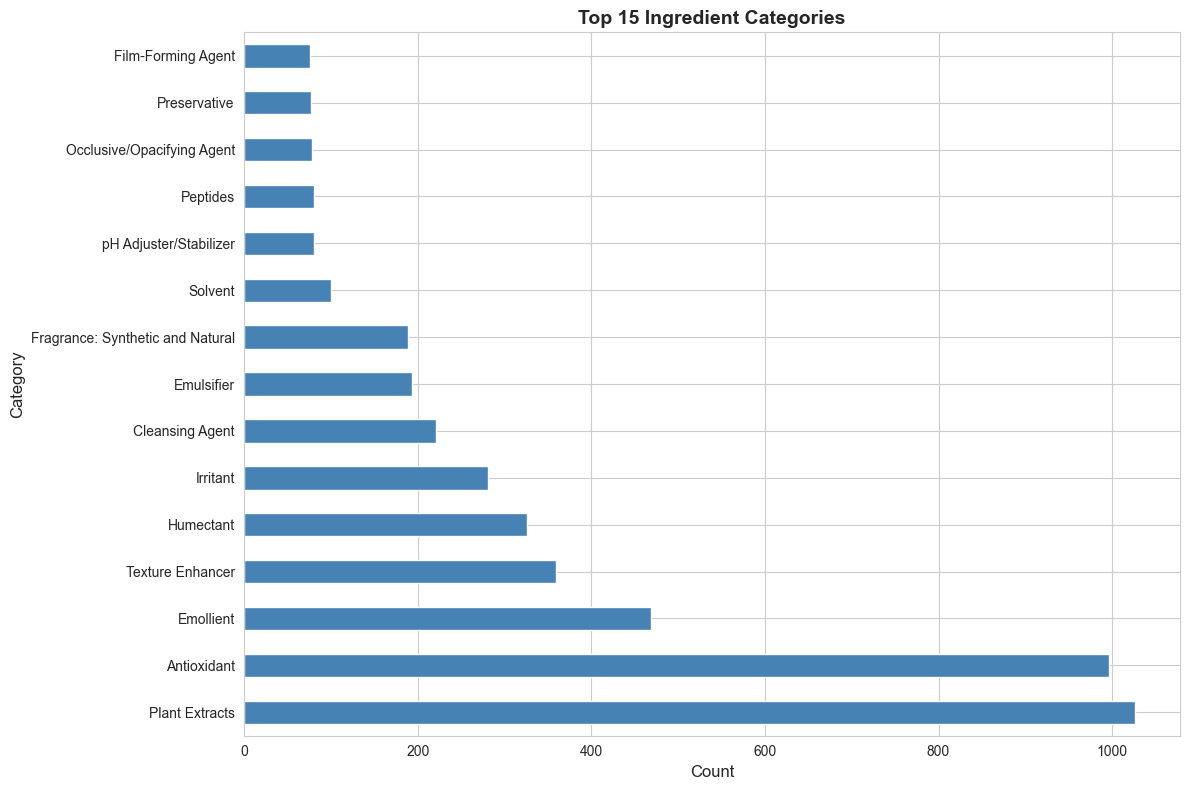

In [25]:
# Categories analysis
print("Ingredients with categories:")
has_categories = df_clean['categories'].notna() & (df_clean['categories'] != '')
print(f"  Count: {has_categories.sum()}")
print(f"  Percentage: {has_categories.sum()/len(df_clean)*100:.2f}%")

# Extract unique categories
all_categories = []
for categories_str in df_clean[has_categories]['categories']:
    if isinstance(categories_str, str) and categories_str.startswith('Categories:'):
        categories = categories_str.replace('Categories: ', '').split(', ')
        all_categories.extend(categories)

if all_categories:
    categories_series = pd.Series(all_categories)
    print("\nMost common categories:")
    top_categories = categories_series.value_counts().head(15)
    print(top_categories)
    
    # Visualization
    plt.figure(figsize=(12, 8))
    top_categories.plot(kind='barh', color='steelblue')
    plt.title('Top 15 Ingredient Categories', fontsize=14, fontweight='bold')
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.tight_layout()
    plt.show()

In [26]:
# INFO_GLANCE analysis
print("Ingredients with detailed info:")
has_info = df_clean['INFO_GLANCE'].notna() & (df_clean['INFO_GLANCE'] != '')
print(f"  Count: {has_info.sum()}")
print(f"  Percentage: {has_info.sum()/len(df_clean)*100:.2f}%")

# Sample ingredients with info
print("\nSample ingredients with detailed information:")
display(df_clean[has_info][['ingredient_name', 'rating_clean', 'INFO_GLANCE']].head(5))

Ingredients with detailed info:
  Count: 1384
  Percentage: 54.64%

Sample ingredients with detailed information:


,ingredient_name,rating_clean,INFO_GLANCE
1,Alcloxa,Average,Combination of sodium salt of aluminum + allantoinUsed for wound healing and burn treatmentHas a...
2,Albumen,Average,Another name for egg whiteUsed as food and as a food additiveHas skin tightening properties that...
5,Acacia Farnesiana Extract,Average,Also known as “sweet acacia”Flowers + oil are highly fragrant and potentially irritatingHas astr...
6,Sorbitan Palmitate,Good,Primarily used in skin care as an emulsifierConsidered a nonionic surfactant (mild cleansing age...
8,Zingiber Aromaticus Extract,Good,Has antioxidant propertiesName can be synonymous with Zingiber zerumbetAlso called fragrant ging...


## 7. Clean Column Selection

Let's select only the relevant columns for the SkinGen project.

In [27]:
# Select relevant columns
df_final = df_clean[[
    'ingredient_name',
    'rating',
    'rating_clean',
    'benefits',
    'categories',
    'INFO_GLANCE'
]].copy()

print(f"Final dataset shape: {df_final.shape}")
display(df_final.head())

Final dataset shape: (2533, 6)


,ingredient_name,rating,rating_clean,benefits,categories,INFO_GLANCE
0,Alcohol,Rating: Average,Average,NaN,"Categories: Emollient, Cleansing Agent, Irritant",NaN
1,Alcloxa,Rating: Average,Average,NaN,"Categories: Irritant, Exfoliant, Cleansing Agent",Combination of sodium salt of aluminum + allantoinUsed for wound healing and burn treatmentHas a...
2,Albumen,Rating: Average,Average,NaN,Categories: Film-Forming Agent,Another name for egg whiteUsed as food and as a food additiveHas skin tightening properties that...
3,Acid,Rating: Average,Average,NaN,"Categories: Exfoliant, pH Adjuster/Stabilizer",NaN
4,Acetyl Tributyl Citrate,Rating: Average,Average,NaN,Categories: Film-Forming Agent,NaN


## 8. Data Validation

In [28]:
# Final checks
print("Final Data Quality Checks:")
print(f"1. Total ingredients: {len(df_final)}")
print(f"2. Unique ingredients: {df_final['ingredient_name'].nunique()}")
print(f"3. Duplicate ingredient names: {df_final['ingredient_name'].duplicated().sum()}")
print(f"4. Missing ingredient names: {df_final['ingredient_name'].isnull().sum()}")
print(f"5. Missing ratings: {df_final['rating_clean'].isnull().sum()}")

# Check rating values
print("\n6. Valid rating values:")
print(df_final['rating_clean'].unique())

Final Data Quality Checks:
1. Total ingredients: 2533
2. Unique ingredients: 2532
3. Duplicate ingredient names: 0
4. Missing ingredient names: 1
5. Missing ratings: 7

6. Valid rating values:
['Average' 'Good' nan 'Best' 'Rating:' 'Worst' 'Bad']


## 9. Save Cleaned Data

In [29]:
# Save to CSV
output_path = '/mnt/user-data/outputs/ingredients_cleaned.csv'
df_final.to_csv(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")

# Display summary statistics
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"Original files combined: {df1.shape[0] + df2.shape[0]} rows")
print(f"Duplicates removed: {(df1.shape[0] + df2.shape[0]) - len(df_final)}")
print(f"Final clean dataset: {len(df_final)} unique ingredients")
print("="*60)

OSError: Cannot save file into a non-existent directory: '\mnt\user-data\outputs'

## 10. Sample Analysis: Ingredient Quality by Category

Let's analyze which categories tend to have better or worse ratings.

In [30]:
# Create a rating score for analysis
rating_score = {'Best': 5, 'Good': 4, 'Average': 3, 'Bad': 2, 'Worst': 1}
df_final['rating_score'] = df_final['rating_clean'].map(rating_score)

# Extract categories into a list per ingredient
df_final['category_list'] = df_final['categories'].apply(
    lambda x: x.replace('Categories: ', '').split(', ') if isinstance(x, str) and x else []
)

# Explode to have one row per category
df_exploded = df_final.explode('category_list')
df_exploded = df_exploded[df_exploded['category_list'] != '']

# Calculate average rating per category
category_ratings = df_exploded.groupby('category_list')['rating_score'].agg(['mean', 'count']).reset_index()
category_ratings.columns = ['Category', 'Avg_Rating', 'Count']
category_ratings = category_ratings[category_ratings['Count'] >= 10]  # Filter for categories with at least 10 ingredients
category_ratings = category_ratings.sort_values('Avg_Rating', ascending=False)

print("Top 10 highest-rated categories (min 10 ingredients):")
display(category_ratings.head(10))

print("\nTop 10 lowest-rated categories (min 10 ingredients):")
display(category_ratings.tail(10))

Top 10 highest-rated categories (min 10 ingredients):


,Category,Avg_Rating,Count
19,Retinoids,4.818182,11
24,UV Filters,4.600000,35
14,Peptides,4.587500,80
17,Prebiotic/Probiotic/Postbiotic,4.545455,22
6,Emollient,4.353945,469
2,Antioxidant,4.326305,996
11,Humectant,4.208589,326
16,Polymer,4.078125,64
13,Occlusive/Opacifying Agent,4.051282,78
3,Chelating Agent,4.041667,24



Top 10 lowest-rated categories (min 10 ingredients):


,Category,Avg_Rating,Count
4,Cleansing Agent,3.859729,221
15,Plant Extracts,3.856865,1027
0,Absorbent,3.745098,51
21,Solvent,3.680000,100
25,pH Adjuster/Stabilizer,3.675000,80
5,Coloring Agent/Pigment,3.616667,60
18,Preservative,3.376623,77
1,Antibacterial,3.235294,17
12,Irritant,1.469751,281
10,Fragrance: Synthetic and Natural,1.382979,188


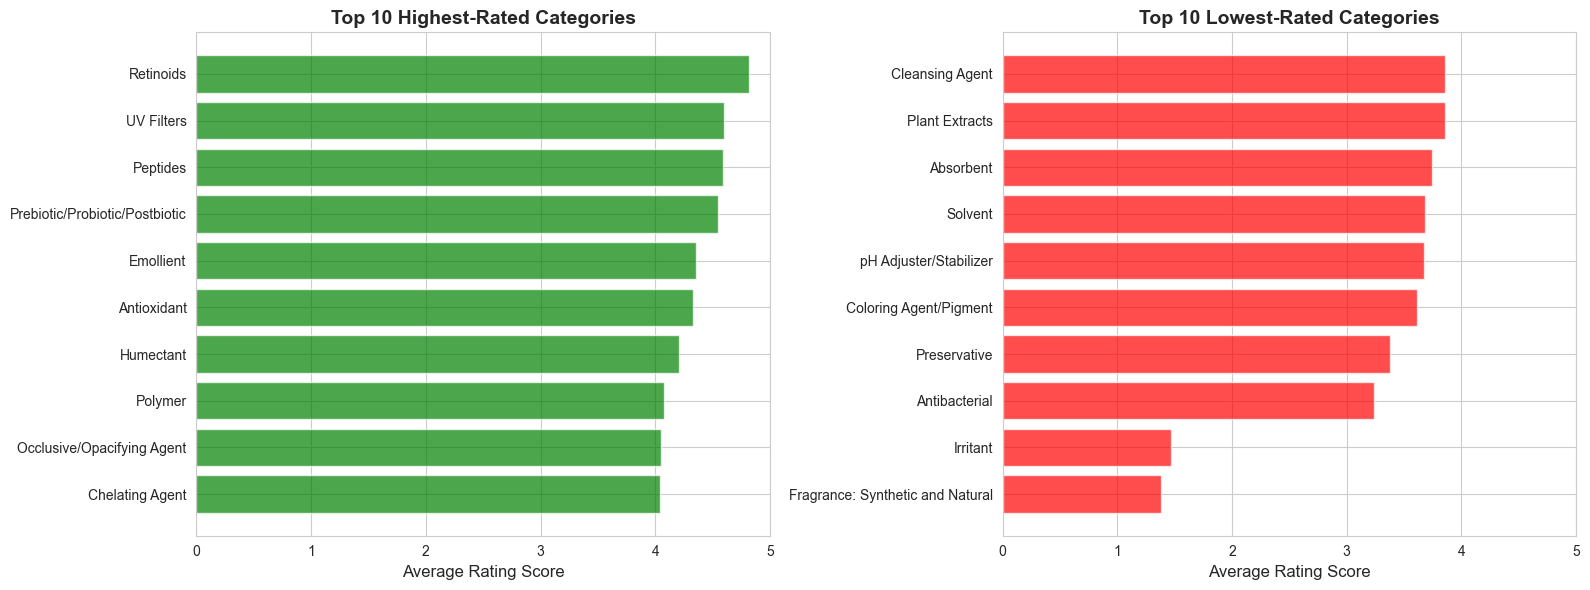

In [31]:
# Visualize top and bottom categories
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top categories
top_10 = category_ratings.head(10)
ax1.barh(top_10['Category'], top_10['Avg_Rating'], color='green', alpha=0.7)
ax1.set_xlabel('Average Rating Score', fontsize=12)
ax1.set_title('Top 10 Highest-Rated Categories', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 5)
ax1.invert_yaxis()

# Bottom categories
bottom_10 = category_ratings.tail(10)
ax2.barh(bottom_10['Category'], bottom_10['Avg_Rating'], color='red', alpha=0.7)
ax2.set_xlabel('Average Rating Score', fontsize=12)
ax2.set_title('Top 10 Lowest-Rated Categories', fontsize=14, fontweight='bold')
ax2.set_xlim(0, 5)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

## Conclusion

The ingredient data has been successfully cleaned and prepared for the SkinGen project. Key findings:

- Started with 2 files containing potentially overlapping data
- Removed duplicates to create a clean dataset
- Analyzed ingredient ratings, benefits, and categories
- Identified high-quality and potentially problematic ingredient categories

**Next Steps:**
1. Use this cleaned ingredient database for product analysis
2. Develop the ingredient intelligence layer for SkinGen
3. Integrate with product recommendations system